#Yiran Wang

## Research question/interests
**My research question is, the relationship between the number of users(cnt) and the date (holidays, weekends, weekdays, seasons, and these are of course related to year month day)**. My friends and I usually use Lime which is a software for sharing scooters and bicycles. The shared bicycle system is also very popular in my hometown. As a user who has participated in and registered for the shared bicycle system, I am very curious about the relationship between the number of users and the date, and how they affect each other.

First, I only uploaded hour.csv because our group decided to only use the hour.csv file, which has more information than day.csv. Then integrate the "hour" rows of the same date, which is more convenient for my later research.

Then, I will delete some columns that are unnecessary for my research direction for cleaning the dataset. I am going to drop casual and register columns, and only use their sum cnt column as the result. I will also remove columns that are not my research direction, such as the column of weather. This also controls the variables.

Afterwards, I would first select holidays and then separate out weekdays and weekends so that they can be analyzed separately. I plan to use loop when filtering, because 6 and 0 in weekday represent Saturday and Sunday, so use this as a condition, store these weekend dates into a new dataframe after running, and filter weekdays and holidays in the same way.

Ploting is necessary because diagrams can directly reflect relationships.For these three items, at least three charts can be made (the chart type cannot be determined, because there are still many charts that I have not yet learned).

Finally, according to the graph, the horizontal axis is the date (holiday, workingday, weekday), and the vertical axis is the number of users, so that it can be analyzed in which period a large change in the number of users usually occurs.

**Milestone 3 task2**


I have split the two years data contained in the dataset into year1 and year2 in milestone3 and plotted based on these. Plot seasonal users distribution, weekday users distribution, work days and rest days (including holiday and weekend) user distribution and other graphs for subsequent analysis.
The clean and other work of the dataset has been completed, and there is no need to delete or add columns in the future, and it is ready to start analysis.
I'm going to use a big-to-small analysis plan, that is, look at the big picture first and then the details.

First of all, I need to get a rough idea of the two years' users number.
Then look at the chart to see which month has more users in the two years and which season corresponds to it.
Then check the weekday and workingday of this month, and check whether there are holidays to determine why there are more users in some particular months.
And it is necessary to compare and observe the data of two years.

The diagrams made this time may not be enough, and I may plot more diagrams as the plan progresses, because the number of columns is large, so the workload of analysis will be relatively large.
Seasonal distribution map, monthly distribution map, annual distribution map, workingday distribution map, weekday distribution map, but I will ask TA if it is necessary to make a holiday distribution map (because holiday has been included in working day, because if don’t do this, there may be working days overlap with holidays, it is more tricky when the code is run and viewed), if possible, I may need to make hourly plots to understand when the number of users changes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Milestone2(load the dataset)

In [ ]:
df=pd.read_csv('../../project-group-group45C/data/raw/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Milestone3/4 (create and visualization)

In [ ]:
drop = ['weathersit','temp','atemp','hum','windspeed','casual','registered','instant']
df = df.drop(drop, axis=1)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600
...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114
727,2012-12-28,1,1,12,0,5,1,3095
728,2012-12-29,1,1,12,0,6,0,1341
729,2012-12-30,1,1,12,0,0,0,1796


In [ ]:
df = df.dropna(axis=0) 
df

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600
...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114
727,2012-12-28,1,1,12,0,5,1,3095
728,2012-12-29,1,1,12,0,6,0,1341
729,2012-12-30,1,1,12,0,0,0,1796


In [ ]:
df.to_csv('../data/processed/emily_df_new.csv')  

In [ ]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,season,yr,mnth,holiday,weekday,workingday,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,8714.000000


In [ ]:
df.shape

(731, 8)

In [ ]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600


In [ ]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'cnt'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      731 non-null    object
 1   season      731 non-null    int64 
 2   yr          731 non-null    int64 
 3   mnth        731 non-null    int64 
 4   holiday     731 non-null    int64 
 5   weekday     731 non-null    int64 
 6   workingday  731 non-null    int64 
 7   cnt         731 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 45.8+ KB


In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [ ]:
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
cnt,731.0,4504.348837,1937.211452,22.0,3152.0,4548.0,5956.0,8714.0


In [ ]:
df.groupby([pd.Grouper(key='dteday', freq='M')]).cnt.sum()

dteday
2011-01-31     38189
2011-02-28     48215
2011-03-31     64045
2011-04-30     94870
2011-05-31    135821
2011-06-30    143512
2011-07-31    141341
2011-08-31    136691
2011-09-30    127418
2011-10-31    123511
2011-11-30    102167
2011-12-31     87323
2012-01-31     96744
2012-02-29    103137
2012-03-31    164875
2012-04-30    174224
2012-05-31    195865
2012-06-30    202830
2012-07-31    203607
2012-08-31    214503
2012-09-30    218573
2012-10-31    198841
2012-11-30    152664
2012-12-31    123713
Freq: M, Name: cnt, dtype: int64

In [ ]:
df.groupby([pd.Grouper(key='dteday', freq='Y')]).cnt.sum()

dteday
2011-12-31    1243103
2012-12-31    2049576
Freq: A-DEC, Name: cnt, dtype: int64

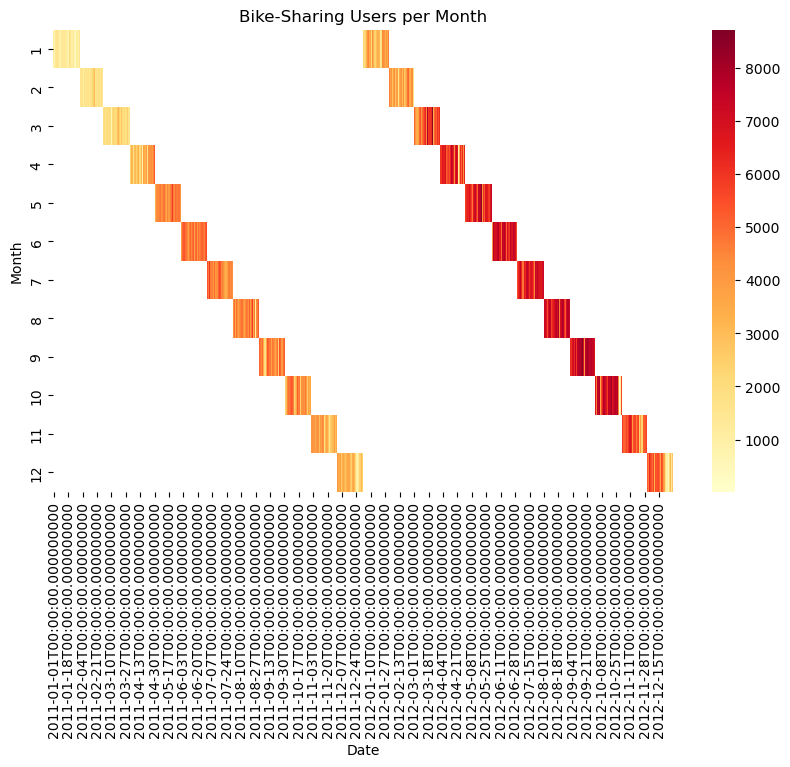

In [ ]:
df['month'] = df['dteday'].dt.month
month_users = df.pivot_table(index='month', columns='dteday', values='cnt')
plt.figure(figsize=(10, 6))
sns.heatmap(month_users, cmap='YlOrRd')
plt.xlabel('Date')
plt.ylabel('Month')
plt.title('Bike-Sharing Users per Month')
plt.show()
##this graph could let me to read which month the users count is high this is more abvious. After that here is a ridgline 
#also shows the monthly users, but it could let me to read the change of the users count in the month. They play different roles

#The peak season is concentrated in summer, and in 2012 the number of users were higher than 2011 in any months, and the 
#peak season kept longer until October it began to fall down.


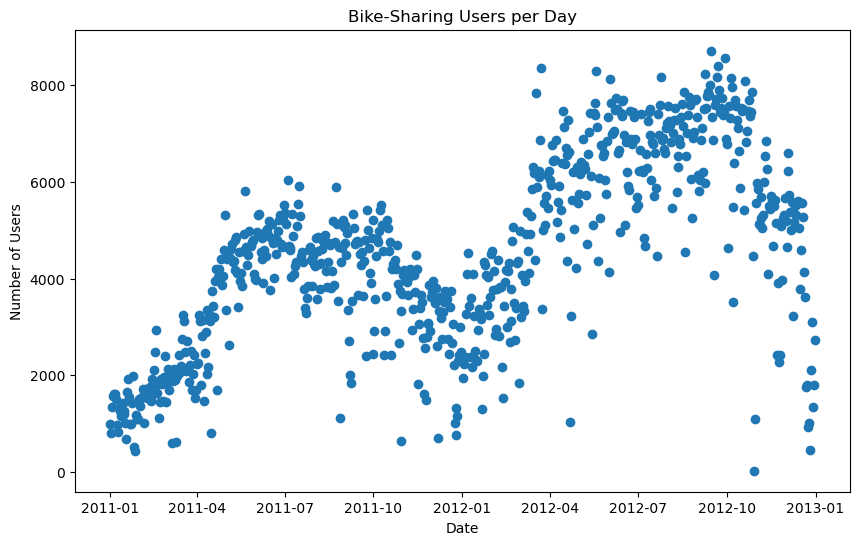

In [ ]:
df['date'] = pd.to_datetime(df['dteday'])
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Bike-Sharing Users per Day')
plt.show()
##this is the overview of daily count users change by dteday.

In [ ]:
year1=df[df["yr"] == 0]
year1
##I divide the df to two as year1 and year2, so everything would follow by the year so the graph
##would not be too crowd, it should look clear.

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt,month,date
0,2011-01-01,1,0,1,0,6,0,985,1,2011-01-01
1,2011-01-02,1,0,1,0,0,0,801,1,2011-01-02
2,2011-01-03,1,0,1,0,1,1,1349,1,2011-01-03
3,2011-01-04,1,0,1,0,2,1,1562,1,2011-01-04
4,2011-01-05,1,0,1,0,3,1,1600,1,2011-01-05
...,...,...,...,...,...,...,...,...,...,...
360,2011-12-27,1,0,12,0,2,1,1162,12,2011-12-27
361,2011-12-28,1,0,12,0,3,1,2302,12,2011-12-28
362,2011-12-29,1,0,12,0,4,1,2423,12,2011-12-29
363,2011-12-30,1,0,12,0,5,1,2999,12,2011-12-30


In [ ]:
year1.to_csv('../data/processed/2011data.csv')  

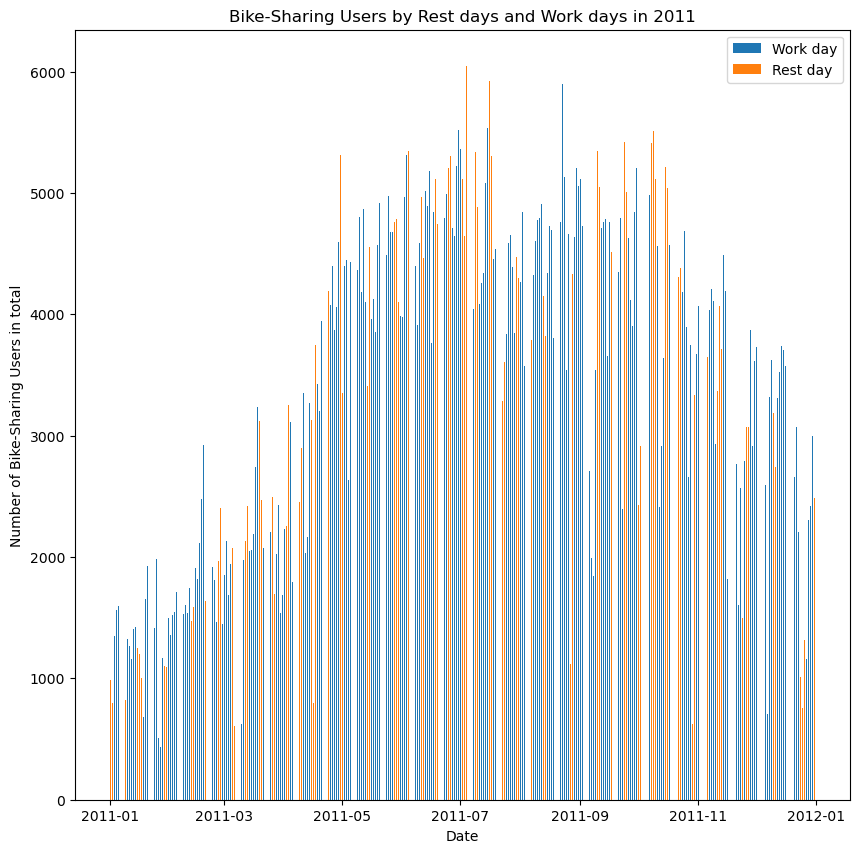

In [ ]:
work = year1[year1['workingday'] == 1]
rest = year1[year1['workingday'] == 0]
plt.figure(figsize=(10, 10))
plt.bar(work['dteday'], work['cnt'], width=0.4, label='Work day')
plt.bar(rest['dteday'], rest['cnt'], width=0.4, label='Rest day')
plt.xlabel('Date')
plt.ylabel('Number of Bike-Sharing Users in total')
plt.title('Bike-Sharing Users by Rest days and Work days in 2011')
plt.legend()
plt.show()
##this could show the work days and rest days(includes holiday and weekend) users count change.
##Correspondong to what we mention above, the peak of users are concentrated on summer especiallt on rest days.
##there are some rest days that the users count are really high and I want to study about it, to discover 



Text(0.5, 1.05, 'Monthly Distribution in 2011')

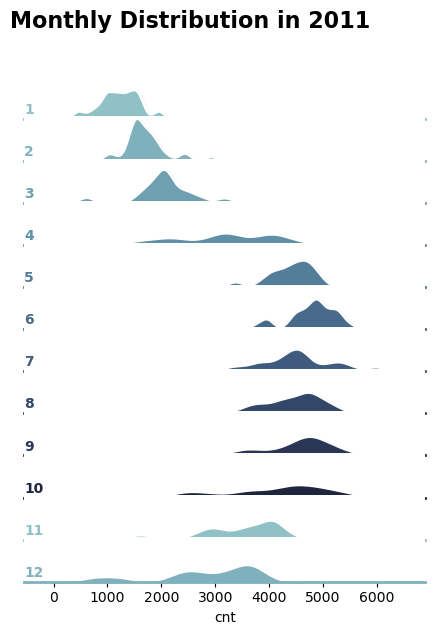

In [41]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(year1, row='mnth',hue='mnth',aspect=10,height=.5,palette=pal)
g.map(sns.kdeplot, 'cnt',bw_adjust=.5,clip_on=False,fill=True,alpha=1,linewidth=1.5)
g.map(sns.kdeplot, 'cnt',clip_on=False,color='w',lw=2,bw_adjust=.5)
g.refline(y=0,linewidth=2,linestyle='-',color=None,clip_on=False)
def label(x,color,label):
    ax = plt.gca()
    ax.text(0, .2,label,fontweight='bold',color=color,
            ha='left',va='center',transform=ax.transAxes)
g.map(label,'cnt')
g.figure.subplots_adjust(hspace=-.05)
g.set_titles('')
g.set(yticks=[],ylabel='')
g.despine(bottom=True,left=True)
g.fig.suptitle('Monthly Distribution in 2011', fontsize=16, fontweight='bold', y=1.05)
##this could see the users number change in month which can observe the trend clearly

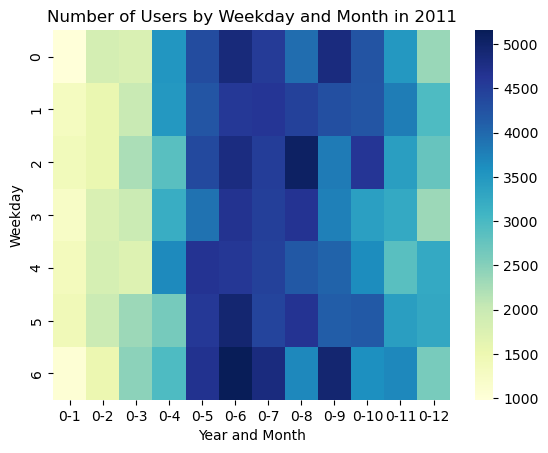

In [31]:
table = pd.pivot_table(year1, values='cnt', index=['weekday'], columns=['yr', 'mnth'], aggfunc='mean')
sns.heatmap(table, cmap='YlGnBu')
plt.title('Number of Users by Weekday and Month in 2011')
plt.xlabel('Year and Month')
plt.ylabel('Weekday')
plt.show()
##this heat map could show the users count in weekdays(monday tuesday thursday like this) in the months of the year

##According to the color, in saturday and sunday, the number of users is usually higher, the color is deeper and it keeps
##almost oone year except for January

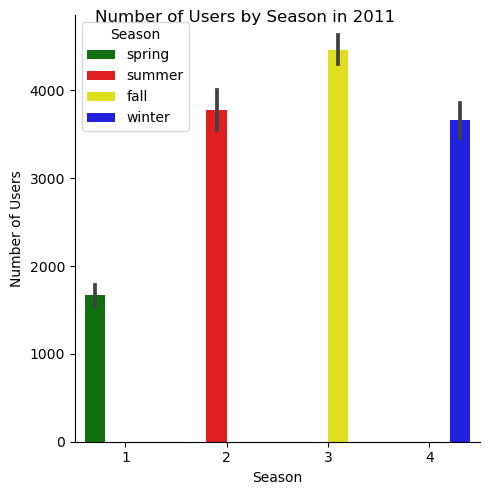

In [32]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
color_dict = {1: 'green', 2: 'red', 3: 'yellow', 4: 'blue'}
palette = [color_dict[season] for season in season_dict.keys()]
plot = sns.catplot(x="season", y="cnt", hue="season", kind="bar", data=year1, palette=palette)
plot.fig.suptitle('Number of Users by Season in 2011')
plot.set(xlabel='Season', ylabel='Number of Users')
legend = plot.ax.legend(title='Season')
for season, label in season_dict.items():
    legend.get_texts()[season-1].set_text(label)
plt.show()
##this shows the distribution of users of seasons
##there is something whcih is interesting that the seasonal distribution trend in 2011 and 2012 is almost the same, so
##the number of users increases from spring until fall reaches the peak then falls down.

In [33]:
year2=df[df["yr"]==1]
year2
##the graph of 2012 is the same as above

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt,month,date
365,2012-01-01,1,1,1,0,0,0,2294,1,2012-01-01
366,2012-01-02,1,1,1,1,1,0,1951,1,2012-01-02
367,2012-01-03,1,1,1,0,2,1,2236,1,2012-01-03
368,2012-01-04,1,1,1,0,3,1,2368,1,2012-01-04
369,2012-01-05,1,1,1,0,4,1,3272,1,2012-01-05
...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114,12,2012-12-27
727,2012-12-28,1,1,12,0,5,1,3095,12,2012-12-28
728,2012-12-29,1,1,12,0,6,0,1341,12,2012-12-29
729,2012-12-30,1,1,12,0,0,0,1796,12,2012-12-30


In [34]:
year2.to_csv('../data/processed/2012data.csv') 

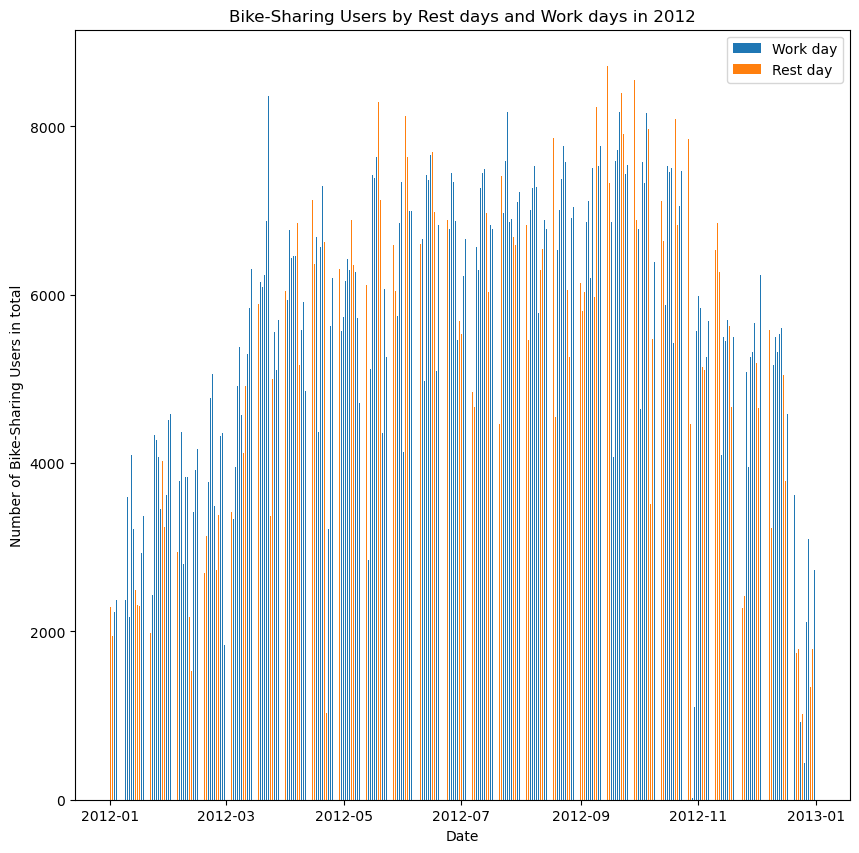

In [35]:
work = year2[year2['workingday'] == 1]
rest = year2[year2['workingday'] == 0]
plt.figure(figsize=(10, 10))
plt.bar(work['dteday'], work['cnt'], width=0.4, label='Work day')
plt.bar(rest['dteday'], rest['cnt'], width=0.4, label='Rest day')
plt.xlabel('Date')
plt.ylabel('Number of Bike-Sharing Users in total')
plt.title('Bike-Sharing Users by Rest days and Work days in 2012')
plt.legend()
plt.show()
##in march there is a work day that the users increased dramatically, I want to search abou that day. 

Text(0.5, 1.05, 'Monthly distribution in 2012')

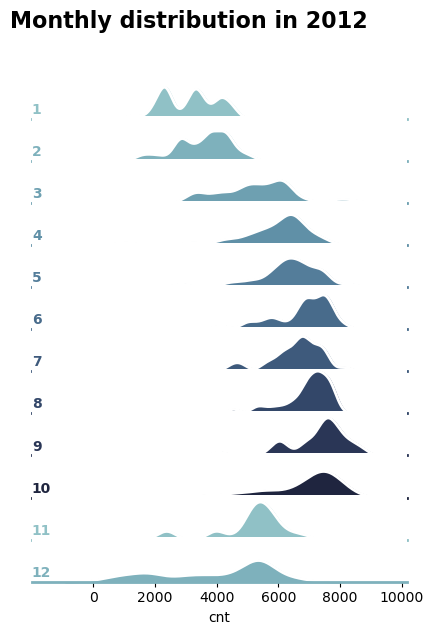

In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(year2, row='mnth',hue='mnth',aspect=10,height=.5,palette=pal)
g.map(sns.kdeplot, 'cnt',bw_adjust=.5,clip_on=False,fill=True,alpha=1,linewidth=1.5)
g.map(sns.kdeplot, 'cnt',clip_on=False,color='w',lw=2,bw_adjust=.5)
g.refline(y=0,linewidth=2,linestyle='-',color=None,clip_on=False)
def label(x,color,label):
    ax = plt.gca()
    ax.text(0, .2,label,fontweight='bold',color=color,
            ha='left',va='center',transform=ax.transAxes)
g.map(label,'cnt')
g.figure.subplots_adjust(hspace=-.05)
g.set_titles('')
g.set(yticks=[],ylabel='')
g.despine(bottom=True,left=True)
g.fig.suptitle('Monthly distribution in 2012', fontsize=16, fontweight='bold', y=1.05)
##the number of users in the first half year had not change so much between months compare with 2011.


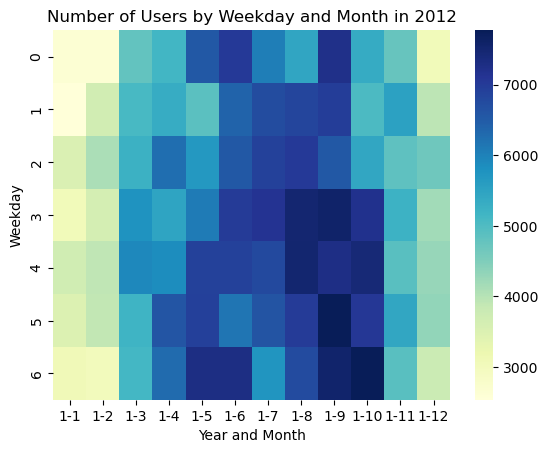

In [ ]:
table = pd.pivot_table(year2, values='cnt', index=['weekday'], columns=['yr', 'mnth'], aggfunc='mean')
sns.heatmap(table, cmap='YlGnBu')
plt.title('Number of Users by Weekday and Month in 2012')
plt.xlabel('Year and Month')
plt.ylabel('Weekday')
plt.show()

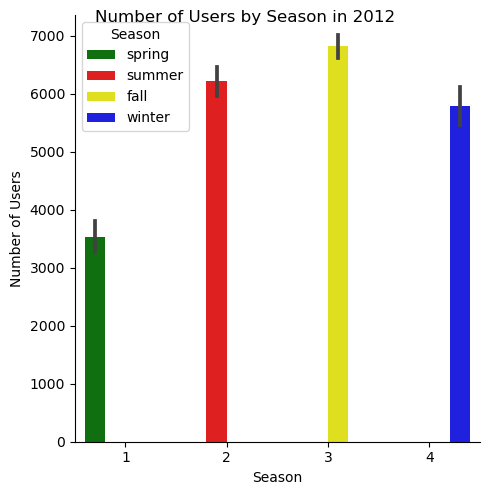

In [ ]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
color_dict = {1: 'green', 2: 'red', 3: 'yellow', 4: 'blue'}
palette = [color_dict[season] for season in season_dict.keys()]
plot = sns.catplot(x="season", y="cnt", hue="season", kind="bar", data=year2, palette=palette)
plot.fig.suptitle('Number of Users by Season in 2012')
plot.set(xlabel='Season', ylabel='Number of Users')
legend = plot.ax.legend(title='Season')
for season, label in season_dict.items():
    legend.get_texts()[season-1].set_text(label)
plt.show()

# Milestone4

In [83]:
import sys
sys.path.append('../..')
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_function
else:
    import sys
    sys.path.append("./code")
    import project_function

In [84]:
from project_function import load_and_process # This is called a relative import
path='../../project-group-group45C/data/raw/day.csv'
df=load_and_process(path)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600
...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114
727,2012-12-28,1,1,12,0,5,1,3095
728,2012-12-29,1,1,12,0,6,0,1341
729,2012-12-30,1,1,12,0,0,0,1796


In [97]:
import sys
sys.path.append('../..')
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_function
else:
    import sys
    sys.path.append("./code")
    import project_function


In [98]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_function
else:
    import sys
    sys.path.append("./code")
    import project_function

In [99]:
from project_function import basic_analyze
path='../../project-group-group45C/data/processed/emily_df_new.csv'
basic_analyze(path)

ImportError: cannot import name 'basic_analyze' from 'project_function' (C:\Users\lenovo\desktop\data301\project-group-group45C\analysis\./code\project_function.py)

In [100]:
import sys
sys.path.append('../../project-group-group45C/analysis/code')
from project_function import visualize_bike_sharing_data

ImportError: cannot import name 'visualize_bike_sharing_data' from 'project_function' (C:\Users\lenovo\desktop\data301\project-group-group45C\analysis\./code\project_function.py)

In [101]:
from project_function import visualize_bike_sharing_data
path1='../../project-group-group45C/data/processed/2011data.csv'
path2='../../project-group-group45C/data/processed/2012data.csv'
visualize_bike_sharing_data(path1)
visualize_bike_sharing_data(path2)

ImportError: cannot import name 'visualize_bike_sharing_data' from 'project_function' (C:\Users\lenovo\desktop\data301\project-group-group45C\analysis\./code\project_function.py)

# My Story
## Milestone4

The story about this project is actually not pleasant. Initially I formed a group with two other people, but then conflicts arose and we had to be split into three separate groups.

I mentioned the reason for researching this topic when I was at milestone1, because shared bicycles are a sport that has gradually become popular in recent years. Whether it is in Kelowna or in my hometown, it can be seen everywhere. I will not learn to ride a bike until the summer of 2021. And I just want to do research on this kind of things in everyday life, which will be more practical, rather than researching some inaccessible things.

I followed the instructions of this project. First, I had a general understanding of the dataset to be researched and determined my research questions.

Use the coding skills we have learned to import the dataset and then edit it, such as deleting unnecessary columns, deleting NA values, etc. These are not difficult.

The hard part was about the visualization, I was initially clueless as to what type of images to use or how to put together a useful visualization. So I checked a lot of information, and I also looked through past lab assignments to understand visualization. I made a heat map first, then a scatterplot. These can help me to roughly browse the changes in the number of users every month for two years.
After that, the dataset is divided into two years, and the data of the two years are stored separately. In this way, each image does not need to contain too much data and looks clearer. Every year there are seasonal histograms, weekday heatmaps, and monthly ridgeline, workday and holiday histograms. I want to make images of the columns and cnt related to the date. This time, in order to judge the cnt change of the year, I added the image of the year.

I then need to analyze these images.

This is my first contact with python, and it is also the first time I have completed a data analysis project by myself. At first, I was very worried that I would not be able to complete this work alone. Whether it was code or thinking difficulties, I overcame them. So nothing is impossible.


## analyze

From the heat map of the total number of shared bicycle users from 2011 to 2012 and the seasonal distribution of the number of users in 2011 and 2012, it can be seen that in 2011 and 2012, the peak season for bicycle use usually occurs in spring and summer. The peak season in 2012 lasted longer than in 2011 and lasted until November. It might have something to do with the weather (since the holidays haven't changed much over the two years, 2012 had one more day in January than 2011). Overall, the number of users in 2012 is more than that in 2011 every month, because the number of users in 2011 is the basis for 2012.

The scatterplots of 2011 and 2012 can also observe this phenomenon more clearly and intuitively, but this may be a bit repetitive, so I am hesitant to delete this image.

## 2011 analyze
From the histograms of the monthly rest day and working day in 2011, as the temperature rises and falls, the number of users who use shared bicycles every day also rises, usually rising in March to April, and then falling in autumn and winter, October to November.
On a restday in July 2011, the number of users soared to an unprecedented height. It was the only holiday in July.

The ridgeline plot can show the fluctuation and data of the number of users within a month. It can be said that it combines the advantages of the previous two images and looks more intuitive. But the disadvantage is that it is not detailed enough and can only be browsed roughly. Obviously, since May, the number of users has been around 4,000 to 5,000, and the number in the middle and late summer time is usually around 5,000. January, February, March, November, and December are usually below 3000.

In the 2011 weekday heat map, it is worth noting that the total number of users on all Tuesdays in August has reached more than 5,000, but there is no holiday in August 2021. From May to August, the number of users is large and dense, and the total number of any weekday every month can reach at least about 3,500.

The subsequent seasonal distribution of users in 2021 is another proof of our original analysis. Over the course of a year, the number of users rose and then fell. But in fact, the real peak occurs in autumn.


## 2012 analyze
2012 had one more day of holiday in January than 2011, but that hasn't changed dramatically.

As mentioned before, the overall number of users in 2012 was much higher than in 2011, and the peak season lasted longer than in 2011. From the seasonal distribution chart of the number of users in 2012, it can be seen that the data in 2011 was only about 1700, 3800, 4400, and 3700, and in 2012 it reached 3500, 6200, 6700, and 6000, which almost doubled. The peak in 2012 still occurred in autumn.

In the heat map of weekday in 2012, compared with 2011, the peak period in 2011 appeared more on Saturdays and Sundays, and once on Tuesdays. In 2012, weekday peaked many times even on working day, such as Wednesday in August and September, Friday in September, etc.
From the perspective of ridgeline in 2012, the number of users began to rise in March, reaching 6,000, and continued until October, with a distribution of around 8,000 during the period.

In the distribution chart of working day and rest day in 2012, the number of users increased sharply on a working day from March to April, but the reason cannot be judged based on the current information. In May, September, and November, the number of users suddenly increased on rest days. And the trend is more violent than in 2011. The highest number of daily users in 2011 was only around 6,000, and in 2012 it reached more than 8,000 several times.